<a href="https://colab.research.google.com/github/vimita/Predictive_Modeling-Deep-Learning-/blob/master/pytorch_modeling3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/my-drive')

Drive already mounted at /content/my-drive; to attempt to forcibly remount, call drive.mount("/content/my-drive", force_remount=True).


In [4]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd 
nz_crime_data=pd.read_csv('my-drive/My Drive/Deep Learning(Predictive Policing)/nz_crime_dataset_new.csv', encoding='utf-8-sig')

In [6]:
nz_crime_data.shape

(1167347, 19)

In [7]:
nz_crime_data.info()
nz_crime_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167347 entries, 0 to 1167346
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DATE_NO_TIME               1167347 non-null  object 
 1   DATE_TIME                  1167347 non-null  object 
 2   DAY_AREA_CRIME_COUNT_ROLL  1167347 non-null  float64
 3   DAY_AREA_CRIME_COUNT       1167347 non-null  int64  
 4   MONTH_AREA_CRIME_COUNT     1167347 non-null  int64  
 5   YEAR_AREA_CRIME_COUNT      1167347 non-null  int64  
 6   TIME_SINCE_LAST_CRIME      1167347 non-null  float64
 7   MONTH                      1167347 non-null  int64  
 8   QUARTER                    1167347 non-null  float64
 9   DAY_OF_WEEK                1167347 non-null  object 
 10  DAY                        1167347 non-null  float64
 11  HOUR                       1167347 non-null  float64
 12  HOUR_PARTITION             1167347 non-null  float64
 13  MESHBLOCK   

,DAY_AREA_CRIME_COUNT_ROLL,DAY_AREA_CRIME_COUNT,MONTH_AREA_CRIME_COUNT,YEAR_AREA_CRIME_COUNT,TIME_SINCE_LAST_CRIME,MONTH,QUARTER,DAY,HOUR,HOUR_PARTITION,MESHBLOCK,WEAPON_TYPE,RISK
count,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06,1.167347e+06
mean,1.740339e+04,4.102593e+03,3.252062e+01,3.397887e+02,1.281016e-01,6.536036e+00,2.512512e+00,4.694526e+00,1.310084e+01,1.205440e+01,1.302863e+06,9.731468e-03,1.004760e+00
std,1.485673e+03,2.827224e+03,3.752400e+01,4.161401e+02,7.455829e+00,3.552330e+00,1.149184e+00,1.891168e+00,4.183061e+00,4.167649e+00,8.577749e+05,1.042445e-01,7.758172e-01
min,1.418400e+04,1.179000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.461000e+03,0.000000e+00,0.000000e+00
25%,1.655300e+04,1.628000e+03,1.000000e+01,9.300000e+01,0.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.262178e+01,1.200000e+01,6.075000e+05,0.000000e+00,0.000000e+00
50%,1.718400e+04,1.971000e+03,1.900000e+01,1.960000e+02,0.000000e+00,7.000000e+00,3.000000e+00,6.000000e+00,1.317855e+01,1.200000e+01,1.167000e+06,0.000000e+00,1.000000e+00
75%,1.789000e+04,7.184000e+03,3.900000e+01,3.970000e+02,0.000000e+00,1.000000e+01,4.000000e+00,6.000000e+00,1.400000e+01,1.200000e+01,2.029200e+06,0.000000e+00,2.000000e+00
max,2.263600e+04,8.902000e+03,2.760000e+02,2.294000e+03,5.770000e+02,1.200000e+01,4.000000e+00,7.000000e+00,2.300000e+01,2.100000e+01,3.210003e+06,2.000000e+00,2.000000e+00


In [8]:
# Count total NaN at each column in DataFrame
print(nz_crime_data.isnull().sum())

# Count all NaN in a DataFrame (both columns & Rows)
print(nz_crime_data.isnull().sum().sum())

# erase every row (axis=0) that has "any" Null value in it.
nz_crime_data = nz_crime_data.dropna(how='any',axis=0)

DATE_NO_TIME                 0
DATE_TIME                    0
DAY_AREA_CRIME_COUNT_ROLL    0
DAY_AREA_CRIME_COUNT         0
MONTH_AREA_CRIME_COUNT       0
YEAR_AREA_CRIME_COUNT        0
TIME_SINCE_LAST_CRIME        0
MONTH                        0
QUARTER                      0
DAY_OF_WEEK                  0
DAY                          0
HOUR                         0
HOUR_PARTITION               0
MESHBLOCK                    0
AREA_0                       0
AREA_1                       0
WEAPON_TYPE                  0
CRIME_TYPE                   0
RISK                         0
dtype: int64
0


In [9]:
nz_crime_data.dtypes

DATE_NO_TIME                  object
DATE_TIME                     object
DAY_AREA_CRIME_COUNT_ROLL    float64
DAY_AREA_CRIME_COUNT           int64
MONTH_AREA_CRIME_COUNT         int64
YEAR_AREA_CRIME_COUNT          int64
TIME_SINCE_LAST_CRIME        float64
MONTH                          int64
QUARTER                      float64
DAY_OF_WEEK                   object
DAY                          float64
HOUR                         float64
HOUR_PARTITION               float64
MESHBLOCK                      int64
AREA_0                        object
AREA_1                        object
WEAPON_TYPE                    int64
CRIME_TYPE                    object
RISK                         float64
dtype: object

In [10]:
categorical_columns = ['DATE_NO_TIME', 'DATE_TIME', 'DAY_OF_WEEK','AREA_0','AREA_1','CRIME_TYPE']

In [11]:
numerical_columns  = ['DAY_AREA_CRIME_COUNT_ROLL', 'DAY_AREA_CRIME_COUNT', 'MONTH_AREA_CRIME_COUNT','YEAR_AREA_CRIME_COUNT','TIME_SINCE_LAST_CRIME', 'MONTH', 'DAY', 'QUARTER', 'HOUR_PARTITION', 'MESHBLOCK', 'WEAPON_TYPE']

In [12]:
outputs = ['RISK'] 

In [13]:
for category in categorical_columns:
    nz_crime_data[category] = nz_crime_data[category].astype('category')

In [14]:
#convert_crime = {"CRIME_TYPE": {"Theft and Related Offences": 0,
                                 #"Unlawful Entry With Intent/Burglary, Break and Enter": 1,
                                 #"Acts Intended to Cause Injury": 2,
                                # "Robbery, Extortion and Related Offences": 6,
                                # "Sexual Assault and Related Offences": 3,
                               #  "Abduction, Harassment and Other Related Offences Against a Person": 5}}
#nz_crime_data.replace(convert_crime, inplace=True)

In [15]:
#nz_crime_data['CRIME_TYPE'] = nz_crime_data['CRIME_TYPE'].astype(object).astype(int)

In [16]:
nz_crime_data.dtypes

DATE_NO_TIME                 category
DATE_TIME                    category
DAY_AREA_CRIME_COUNT_ROLL     float64
DAY_AREA_CRIME_COUNT            int64
MONTH_AREA_CRIME_COUNT          int64
YEAR_AREA_CRIME_COUNT           int64
TIME_SINCE_LAST_CRIME         float64
MONTH                           int64
QUARTER                       float64
DAY_OF_WEEK                  category
DAY                           float64
HOUR                          float64
HOUR_PARTITION                float64
MESHBLOCK                       int64
AREA_0                       category
AREA_1                       category
WEAPON_TYPE                     int64
CRIME_TYPE                   category
RISK                          float64
dtype: object

In [17]:
nz_crime_data.head()

,DATE_NO_TIME,DATE_TIME,DAY_AREA_CRIME_COUNT_ROLL,DAY_AREA_CRIME_COUNT,MONTH_AREA_CRIME_COUNT,YEAR_AREA_CRIME_COUNT,TIME_SINCE_LAST_CRIME,MONTH,QUARTER,DAY_OF_WEEK,DAY,HOUR,HOUR_PARTITION,MESHBLOCK,AREA_0,AREA_1,WEAPON_TYPE,CRIME_TYPE,RISK
0,2014-07-03 00:00:00.000000000,2014-07-03 22:00:00.000000000,17402.806665,1445,10,67,0.0,7,3.0,Wednesday,3.0,22.0,21.0,1190602,Bethlehem.,Tauranga City.,0,Theft and Related Offences,0.0
1,2014-07-03 00:00:00.000000000,2014-07-03 08:00:00.000000000,17402.806665,1445,10,67,0.0,7,3.0,Wednesday,3.0,8.0,6.0,1191100,Bethlehem.,Tauranga City.,0,Theft and Related Offences,0.0
2,2014-07-03 00:00:00.000000000,2014-07-03 14:00:00.000000000,17402.806665,1445,10,67,0.0,7,3.0,Wednesday,3.0,14.0,12.0,1191100,Bethlehem.,Tauranga City.,0,Theft and Related Offences,0.0
3,2014-07-03 00:00:00.000000000,2014-07-03 20:00:00.000000000,17402.806665,1445,10,67,0.0,7,3.0,Wednesday,3.0,20.0,18.0,1191206,Bethlehem.,Tauranga City.,0,Theft and Related Offences,0.0
4,2014-07-05 00:00:00.000000000,2014-07-05 17:00:00.000000000,17402.806665,1397,10,67,0.0,7,3.0,Friday,5.0,17.0,15.0,1191100,Bethlehem.,Tauranga City.,0,Theft and Related Offences,0.0


In [18]:
outputs = np.stack(nz_crime_data['RISK'])
outputs[:5]

array([0., 0., 0., 0., 0.])

In [19]:
DATE_NO_TIME = nz_crime_data['DATE_NO_TIME'].cat.codes.values
DATE_TIME = nz_crime_data['DATE_TIME'].cat.codes.values
DAY_OF_WEEK = nz_crime_data['DAY_OF_WEEK'].cat.codes.values
AREA_0 = nz_crime_data['AREA_0'].cat.codes.values
AREA_1 = nz_crime_data['AREA_1'].cat.codes.values
CRIME_TYPE = nz_crime_data['CRIME_TYPE'].cat.codes.values



categorical_data = np.stack([DATE_NO_TIME, DATE_TIME, DAY_OF_WEEK, AREA_0,AREA_1,CRIME_TYPE], 1)

categorical_data[:10]

array([[  2, 204,   8, 126,  49,   1],
       [  2, 144,   8, 126,  49,   1],
       [  2, 196,   8, 126,  49,   1],
       [  2, 202,   8, 126,  49,   1],
       [  4, 336,   1, 126,  49,   1],
       [  3, 264,   5, 126,  49,   1],
       [  1,  77,   6, 126,  49,   0],
       [  5, 407,   7, 126,  49,   1],
       [  5, 344,   3, 126,  49,   2],
       [  6, 444,   4, 126,  49,   1]], dtype=int32)

In [20]:
# creating tensor from aforementioned numpy array
# convert the categorial data numpy array into a tensor object
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[  2, 204,   8, 126,  49,   1],
        [  2, 144,   8, 126,  49,   1],
        [  2, 196,   8, 126,  49,   1],
        [  2, 202,   8, 126,  49,   1],
        [  4, 336,   1, 126,  49,   1],
        [  3, 264,   5, 126,  49,   1],
        [  1,  77,   6, 126,  49,   0],
        [  5, 407,   7, 126,  49,   1],
        [  5, 344,   3, 126,  49,   2],
        [  6, 444,   4, 126,  49,   1]])

In [21]:
# convert the numerical data numpy array into a tensor object
numerical_data = np.stack([nz_crime_data[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]



tensor([[1.7403e+04, 1.4450e+03, 1.0000e+01, 6.7000e+01, 0.0000e+00, 7.0000e+00,
         3.0000e+00, 3.0000e+00, 2.1000e+01, 1.1906e+06, 0.0000e+00],
        [1.7403e+04, 1.4450e+03, 1.0000e+01, 6.7000e+01, 0.0000e+00, 7.0000e+00,
         3.0000e+00, 3.0000e+00, 6.0000e+00, 1.1911e+06, 0.0000e+00],
        [1.7403e+04, 1.4450e+03, 1.0000e+01, 6.7000e+01, 0.0000e+00, 7.0000e+00,
         3.0000e+00, 3.0000e+00, 1.2000e+01, 1.1911e+06, 0.0000e+00],
        [1.7403e+04, 1.4450e+03, 1.0000e+01, 6.7000e+01, 0.0000e+00, 7.0000e+00,
         3.0000e+00, 3.0000e+00, 1.8000e+01, 1.1912e+06, 0.0000e+00],
        [1.7403e+04, 1.3970e+03, 1.0000e+01, 6.7000e+01, 0.0000e+00, 7.0000e+00,
         5.0000e+00, 3.0000e+00, 1.5000e+01, 1.1911e+06, 0.0000e+00]])

In [22]:
outputs = np.stack(outputs)
outputs = torch.tensor(outputs, dtype=torch.float).flatten()
outputs[:5]



tensor([0., 0., 0., 0., 0.])

In [23]:
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([1167347, 6])
torch.Size([1167347, 11])
torch.Size([1167347])


In [24]:
# creates a tuple that contains the number of unique values and the dimension sizes for all the categorical columns:
categorical_column_sizes = [len(nz_crime_data[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(483, 50), (34932, 50), (9, 5), (1938, 50), (66, 33), (3, 2)]


In [25]:
# divide our dataset into training and test sets

total_records = 1167347
test_records = int(total_records * .3)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [26]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

817143
817143
817143
350204
350204
350204


In [27]:
# define our model.
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [28]:
#To create the model
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 3, [200,100,50], p=0.4)

In [29]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(483, 50)
    (1): Embedding(34932, 50)
    (2): Embedding(9, 5)
    (3): Embedding(1938, 50)
    (4): Embedding(66, 33)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=201, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [30]:
 # define the loss function and the optimizer that will be used to train the model.
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
# trains the model:
epochs = 3
aggregated_losses = []
 

for i in range(epochs):
    running_loss = 0
    total_train = 0
    correct_train = 0
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs.long())
    aggregated_losses.append(single_loss)
    

    if i%25 == 1:
       # print('Epoch {}, train Loss: {:.3f}'.format(epochs, single_loss.item()), "Training Accuracy: %d %%" % (train_accuracy))
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

    # accuracy
    #_, predicted = torch.max(y_pred.data, 1)
    #total_train += mask.size(0)
    #correct_train += predicted.eq(mask.data).sum().item()
    #train_accuracy = 100 * correct_train / total_train
    #avg_accuracy = train_accuracy / len(train_loader)    

#print('Epoch {}, train Loss: {:.3f}'.format(epochs, single_loss.item()), "Training Accuracy: %d %%" % (train_accuracy))
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.24382615
epoch:   3 loss: 1.1624979973


In [34]:
epochs = 32
aggregated_losses = []
 

for i in range(epochs):
    running_loss = 0
    total_train = 0
    correct_train = 0
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs.long())
    aggregated_losses.append(single_loss)
    

    if i%25 == 1:
      print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

   
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 1.13170314
epoch:  26 loss: 0.72734582
epoch:  32 loss: 0.6636211276


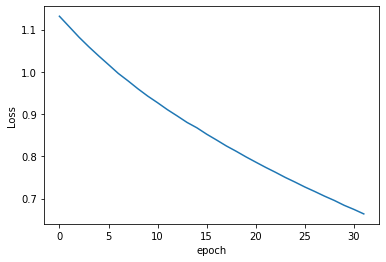

In [35]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [37]:
# Making Predictions on the test class and prints the cross entropy loss for the test data

with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs.long)
print(f'Loss: {loss:.8f}')

AttributeError: ignored

In [38]:
# It is important to note that since we specified that our output layer will contain 3 neurons, each prediction will contain 3 values. For instance, the first 5 predicted values look like this:
print(y_val[:5])

tensor([[-1.2481, -0.2427,  0.4245],
        [ 0.1905,  0.1006,  0.0343],
        [ 0.0117,  0.5437, -0.2512],
        [ 0.0367,  0.6037, -0.8621],
        [ 0.8779,  0.5187, -0.9193]])


In [39]:
y_val = np.argmax(y_val, axis=1)

In [40]:
print(y_val[:5])

tensor([2, 0, 1, 1, 0])


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[62070 53388  3121]
 [29971 86188 16974]
 [ 1608 19352 77532]]
              precision    recall  f1-score   support

         0.0       0.66      0.52      0.58    118579
         1.0       0.54      0.65      0.59    133133
         2.0       0.79      0.79      0.79     98492

    accuracy                           0.64    350204
   macro avg       0.67      0.65      0.66    350204
weighted avg       0.65      0.64      0.64    350204

0.6447384952770385


In [43]:
epochs = 64
aggregated_losses = []
 

for i in range(epochs):
    running_loss = 0
    total_train = 0
    correct_train = 0
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs.long())
    aggregated_losses.append(single_loss)
    

    if i%25 == 1:
      print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

   
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.45567098
epoch:  26 loss: 0.26653227
epoch:  51 loss: 0.17802612
epoch:  64 loss: 0.1460282803


In [44]:

with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs.view(1,-1).long)
print(f'Loss: {loss:.8f}')

AttributeError: ignored

In [45]:
print(y_val[:5])

tensor([[ 1.0576,  2.6560, -3.3227],
        [ 2.6981, -0.7470, -3.1960],
        [ 3.5769, -1.2407, -2.3929],
        [ 4.5267, -0.8734, -4.5956],
        [ 3.4549,  0.1869, -3.8536]])


In [46]:
y_val = np.argmax(y_val, axis=1)

In [47]:
print(y_val[:5])

tensor([1, 0, 0, 0, 0])


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[ 98996  19583      0]
 [  2505 120653   9975]
 [     0   2773  95719]]
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90    118579
         1.0       0.84      0.91      0.87    133133
         2.0       0.91      0.97      0.94     98492

    accuracy                           0.90    350204
   macro avg       0.91      0.90      0.90    350204
weighted avg       0.91      0.90      0.90    350204

0.9005265502392891
